In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
from tqdm import tqdm

In [2]:
from utils import *
from model_utils import *
from train import trainer

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
lr = 0.0002
batch_size = 16
image_size = 64
channels_img = 3
channel_noise = 256
num_epochs = 50

In [5]:
features_d = 64
features_g = 64

In [6]:
data = DatasetGenerator(path = '/notebooks/all-dogs/', image_size = image_size)

In [7]:
dataloader = DataLoader(data, batch_size = batch_size,shuffle = True)

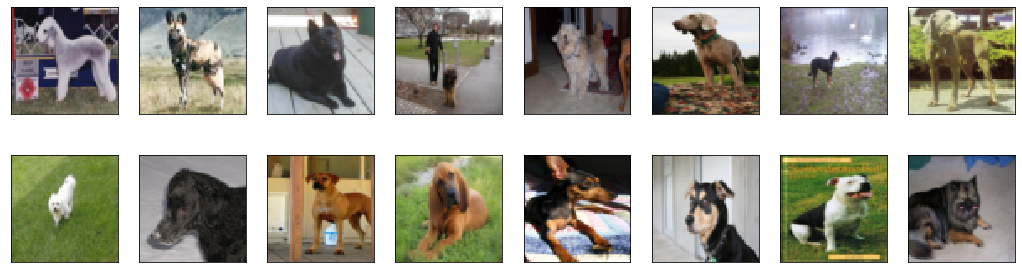

In [8]:
imgs = next(iter(dataloader))
mean = np.array([0.5, 0.5, 0.5])
std = np.array([0.5, 0.5, 0.5])
def im_show(img):
    npimg = img.numpy().transpose((1,2,0))*std + mean
    npimg = np.clip(npimg, 0., 1.)
    plt.imshow(npimg)

fig = plt.figure(figsize=(18,5))

for i in np.arange(16):
    ax = fig.add_subplot(2,8,i+1,xticks=[],yticks=[])
    im_show(imgs[i])
    

In [9]:
D_net = Discriminator(channels_img,features_d).to(device)
G_net = Generator(channel_noise,channels_img,features_g).to(device)

D_net.apply(weights_init)
G_net.apply(weights_init)

D_optimizer = optim.Adam(D_net.parameters(), lr = lr, betas = (0.5,0.999))
G_optimizer = optim.Adam(G_net.parameters(), lr = lr, betas = (0.5,0.999))

In [10]:
criterion = nn.BCELoss()

real_label = 1
fake_label = 0

fixed_noise = torch.randn(batch_size,channel_noise,1,1).to(device)

  0%|          | 0/1287 [00:00<?, ?it/s]

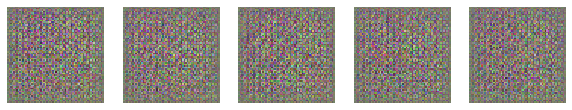

  0%|          | 0/1287 [00:00<?, ?it/s]

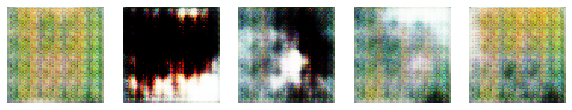

  0%|          | 0/1287 [00:00<?, ?it/s]

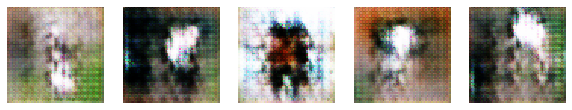

  0%|          | 0/1287 [00:00<?, ?it/s]

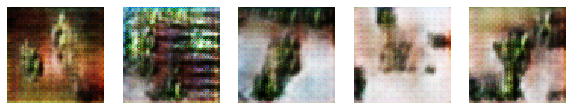

  0%|          | 0/1287 [00:00<?, ?it/s]

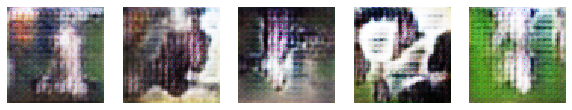

  0%|          | 0/1287 [00:00<?, ?it/s]

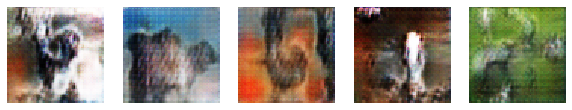

  0%|          | 0/1287 [00:00<?, ?it/s]

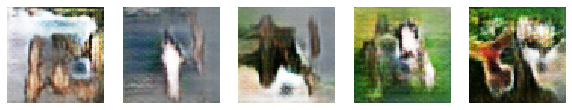

  0%|          | 0/1287 [00:00<?, ?it/s]

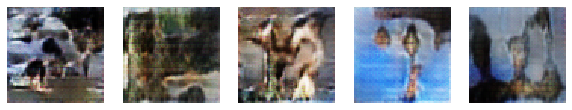

  0%|          | 0/1287 [00:00<?, ?it/s]

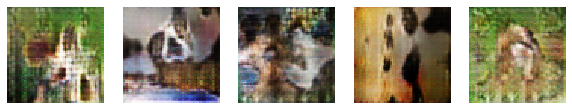

  0%|          | 0/1287 [00:00<?, ?it/s]

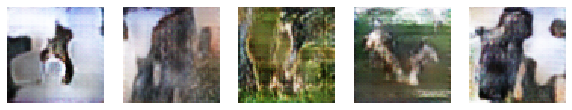

  0%|          | 0/1287 [00:00<?, ?it/s]

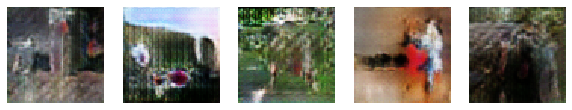

  0%|          | 0/1287 [00:00<?, ?it/s]

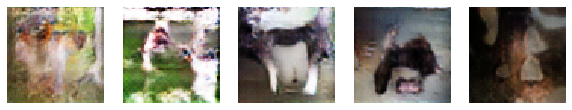

  0%|          | 0/1287 [00:00<?, ?it/s]

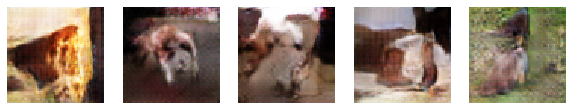

  0%|          | 0/1287 [00:00<?, ?it/s]

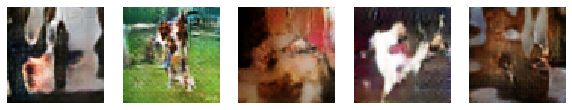

  0%|          | 0/1287 [00:00<?, ?it/s]

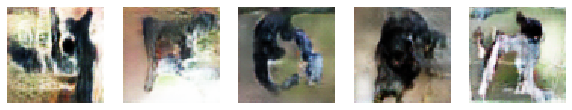

  0%|          | 0/1287 [00:00<?, ?it/s]

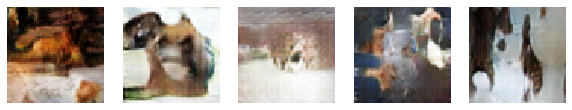

  0%|          | 0/1287 [00:00<?, ?it/s]

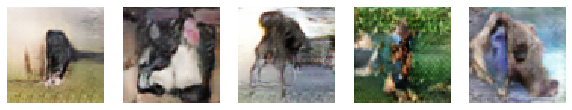

  0%|          | 0/1287 [00:00<?, ?it/s]

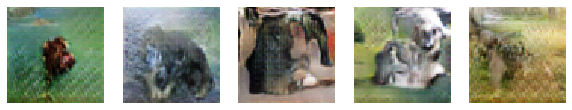

  0%|          | 0/1287 [00:00<?, ?it/s]

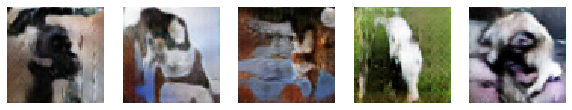

  0%|          | 0/1287 [00:00<?, ?it/s]

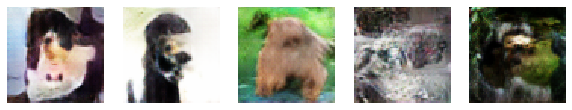

  0%|          | 0/1287 [00:00<?, ?it/s]

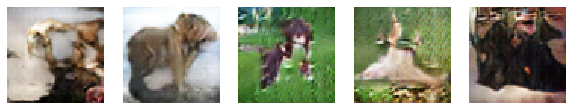

  0%|          | 0/1287 [00:00<?, ?it/s]

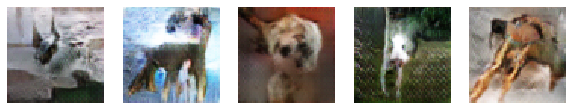

  0%|          | 0/1287 [00:00<?, ?it/s]

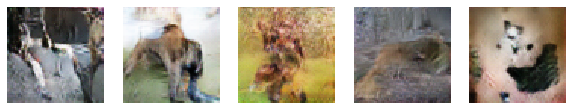

  0%|          | 0/1287 [00:00<?, ?it/s]

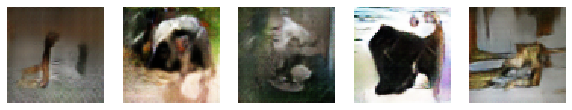

  0%|          | 0/1287 [00:00<?, ?it/s]

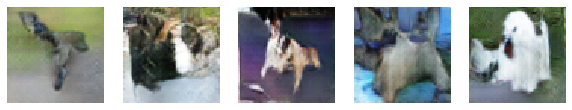

  0%|          | 0/1287 [00:00<?, ?it/s]

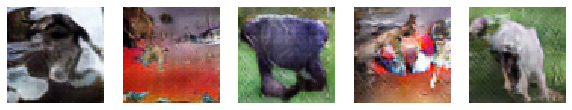

  0%|          | 0/1287 [00:00<?, ?it/s]

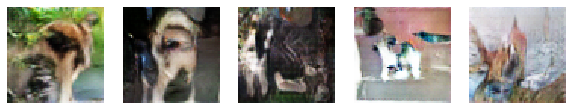

  0%|          | 0/1287 [00:00<?, ?it/s]

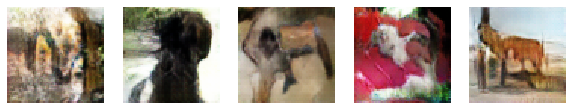

  0%|          | 0/1287 [00:00<?, ?it/s]

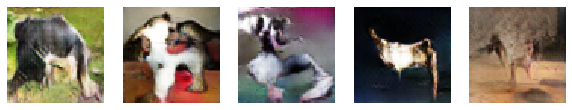

  0%|          | 0/1287 [00:00<?, ?it/s]

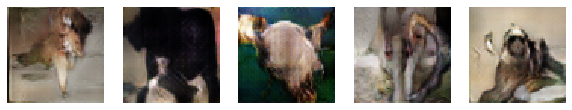

  0%|          | 0/1287 [00:00<?, ?it/s]

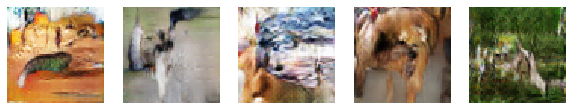

  0%|          | 0/1287 [00:00<?, ?it/s]

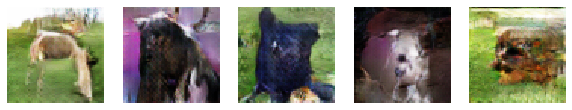

  0%|          | 0/1287 [00:00<?, ?it/s]

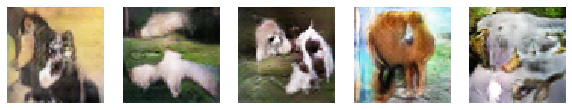

  0%|          | 0/1287 [00:00<?, ?it/s]

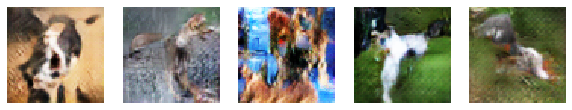

  0%|          | 0/1287 [00:00<?, ?it/s]

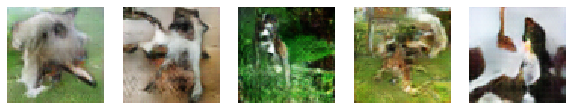

  0%|          | 0/1287 [00:00<?, ?it/s]

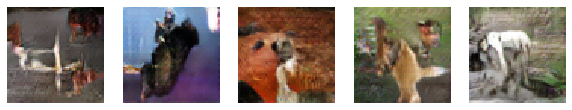

  0%|          | 0/1287 [00:00<?, ?it/s]

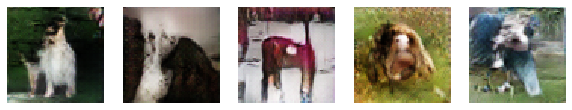

  0%|          | 0/1287 [00:00<?, ?it/s]

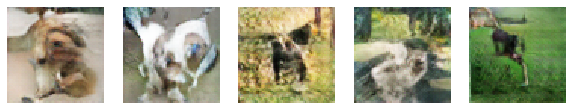

  0%|          | 0/1287 [00:00<?, ?it/s]

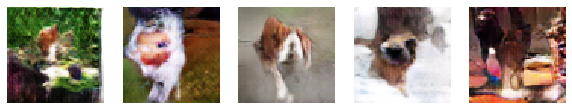

  0%|          | 0/1287 [00:00<?, ?it/s]

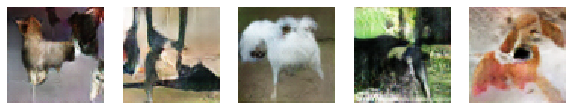

  0%|          | 0/1287 [00:00<?, ?it/s]

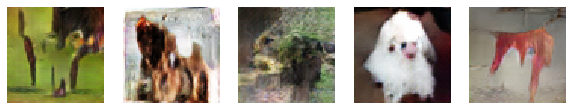

  0%|          | 0/1287 [00:00<?, ?it/s]

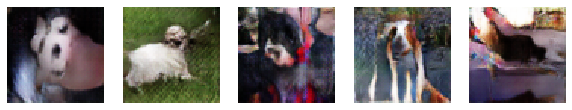

  0%|          | 0/1287 [00:00<?, ?it/s]

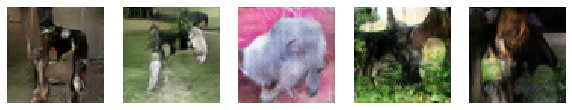

  0%|          | 0/1287 [00:00<?, ?it/s]

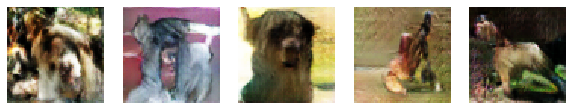

  0%|          | 0/1287 [00:00<?, ?it/s]

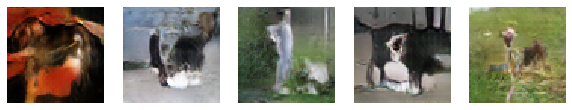

  0%|          | 0/1287 [00:00<?, ?it/s]

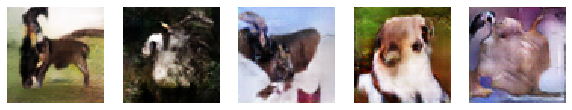

  0%|          | 0/1287 [00:00<?, ?it/s]

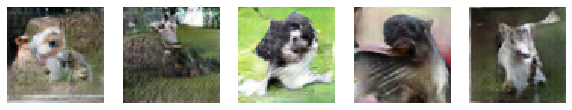

  0%|          | 0/1287 [00:00<?, ?it/s]

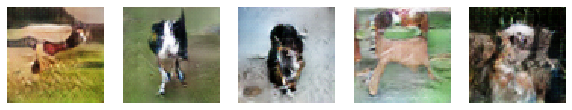

  0%|          | 0/1287 [00:00<?, ?it/s]

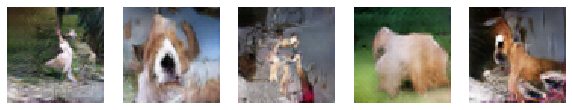

  0%|          | 0/1287 [00:00<?, ?it/s]

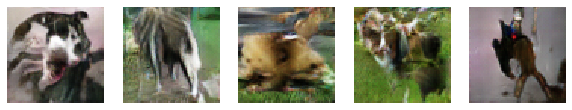

 57%|█████▋    | 732/1287 [01:26<01:03,  8.70it/s]

In [ ]:
trainer(D_net, G_net, criterion, G_optimizer, D_optimizer, dataloader, num_epochs, channel_noise,device)